In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



In [74]:
df = pd.read_csv('parkinsons_disease_progression_500.csv')

In [75]:

print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   Patient_ID  Age Gender  Years_Since_Diagnosis  UPDRS_Score  \
0           1   78      M                      5           41   
1           2   64      F                      3           52   
2           3   57      M                      5           21   
3           4   70      F                      5           19   
4           5   68      M                      5           57   

   Tremor_Severity  Motor_Function  Speech_Difficulty  Balance_Problems  \
0                3               2                  2                 3   
1                4               1                  2                 3   
2                1               0                  0                 5   
3                4               1                  3                 1   
4                3               0                  4                 3   

  Medications Exercise_Level  Disease_Progression  
0    Levodopa       Moderate                    2  
1  Amantadine            

In [76]:
# Step 4: Print all column names to help identify the target column
print("\nColumn names:")
print(df.columns)



Column names:
Index(['Patient_ID', 'Age', 'Gender', 'Years_Since_Diagnosis', 'UPDRS_Score',
       'Tremor_Severity', 'Motor_Function', 'Speech_Difficulty',
       'Balance_Problems', 'Medications', 'Exercise_Level',
       'Disease_Progression'],
      dtype='object')


In [77]:
# Step 5: Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())



Missing values in each column:
Patient_ID               0
Age                      0
Gender                   0
Years_Since_Diagnosis    0
UPDRS_Score              0
Tremor_Severity          0
Motor_Function           0
Speech_Difficulty        0
Balance_Problems         0
Medications              0
Exercise_Level           0
Disease_Progression      0
dtype: int64


In [78]:
# Step 6: Drop rows with missing values (you can also choose to fill them instead)
df = df.dropna()



In [79]:
# Step 7: Identify categorical columns (object type)
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical columns:", categorical_cols.tolist())



Categorical columns: ['Gender', 'Medications', 'Exercise_Level']


In [80]:
# Step 8: Encode categorical columns using LabelEncoder
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [81]:
target_column = 'Disease_Progression'



In [82]:
# Step 10: Safety check - make sure the target column exists
if target_column not in df.columns:
    raise ValueError(f"Target column '{target_column}' not found. Check column names.")




In [83]:
# Step 11: Split data into features (X) and target (y)
X = df.drop(target_column, axis=1)
y = df[target_column]


In [84]:
# Step 12: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [85]:
# Step 13: Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [86]:
# Step 14: Drop the ID column (not useful for prediction)
df = df.drop('Patient_ID', axis=1)


In [87]:
# Step 15: Show the shape of the resulting datasets
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)


Training features shape: (400, 11)
Testing features shape: (100, 11)
Training labels shape: (400,)
Testing labels shape: (100,)


In [88]:
# Step 16: Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Numeric columns:", numeric_cols.tolist())
print("Categorical columns:", categorical_cols.tolist())


Numeric columns: ['Age', 'Gender', 'Years_Since_Diagnosis', 'UPDRS_Score', 'Tremor_Severity', 'Motor_Function', 'Speech_Difficulty', 'Balance_Problems', 'Medications', 'Exercise_Level', 'Disease_Progression']
Categorical columns: []


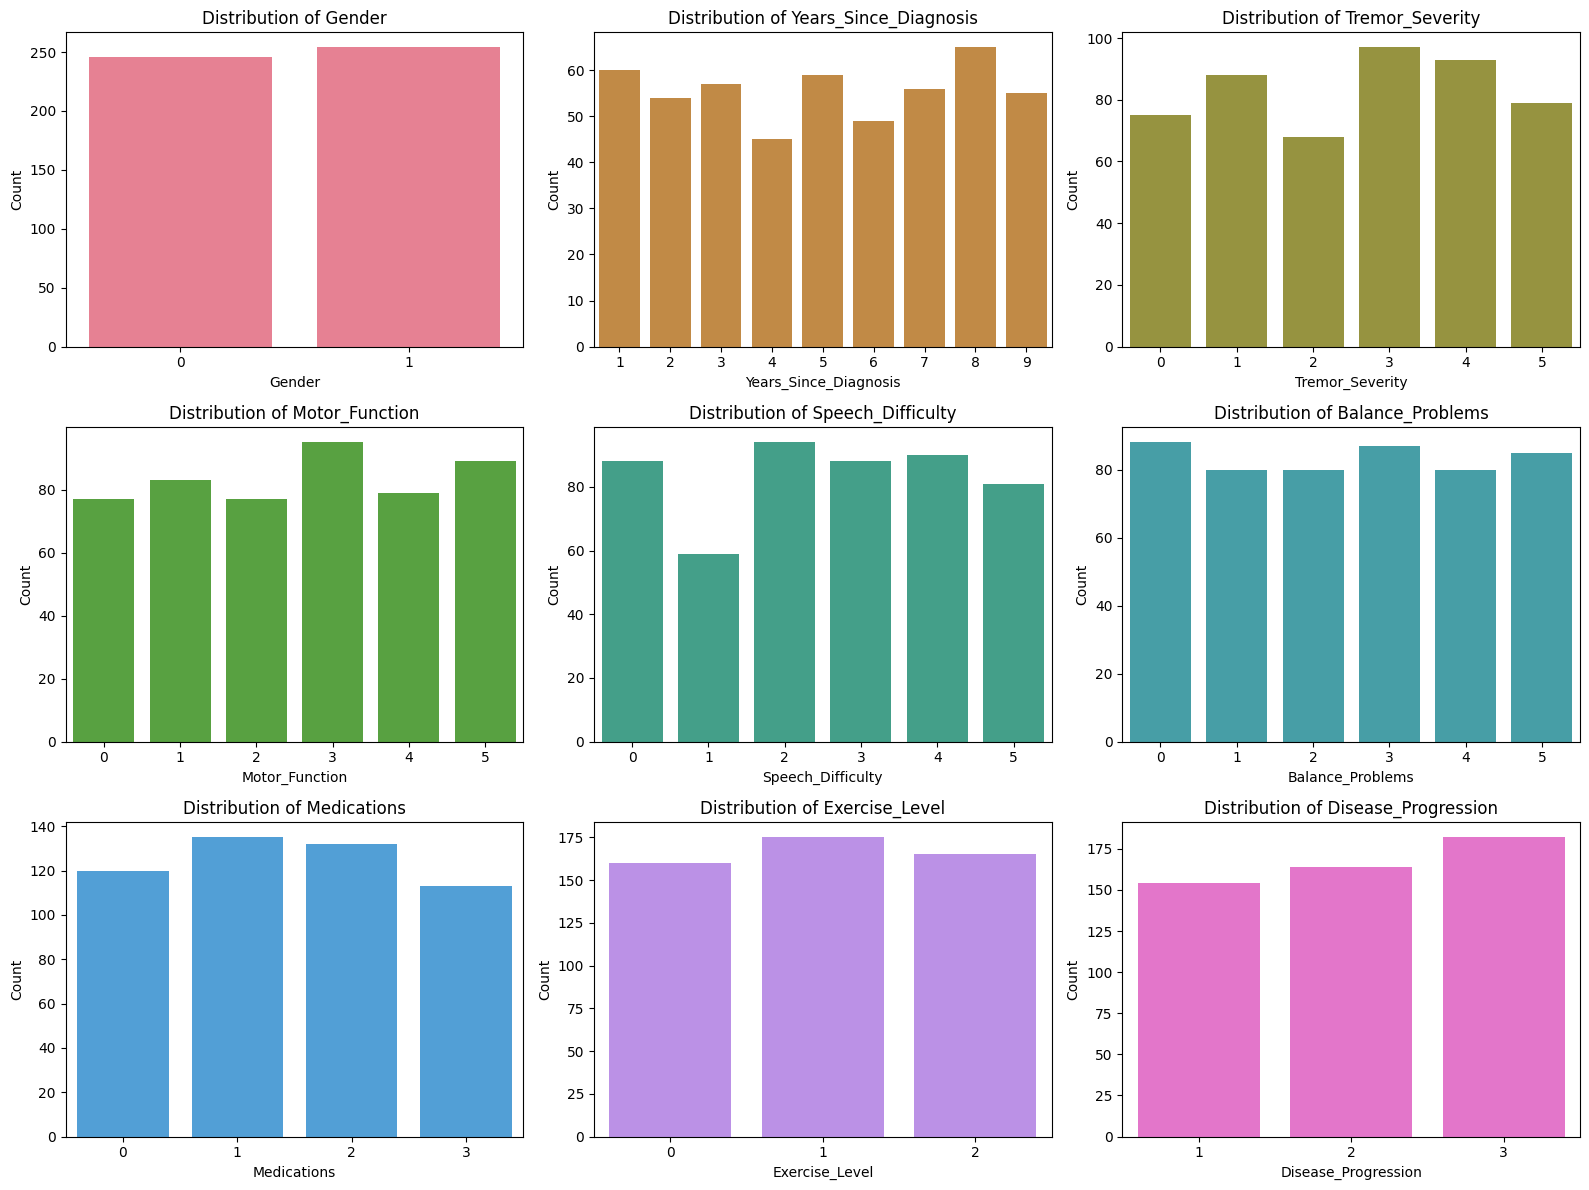

In [89]:
#Step 17 EDA For Numerical variables

import matplotlib.pyplot as plt
import seaborn as sns

# Identify numeric columns, excluding ID and target variables
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
features_to_plot = [col for col in numeric_cols if col not in ['Patient_ID', 'Age', 'UPDRS_Score']]

# Classify numeric variables as discrete or continuous
discrete_features = [col for col in features_to_plot if df[col].nunique() < 10]
continuous_features = [col for col in features_to_plot if df[col].nunique() >= 10]

# Combine for plotting but mark type
plot_features = [(col, 'bar') for col in discrete_features] + [(col, 'hist') for col in continuous_features]

# Plot settings
n_cols = 3
n_rows = -(-len(plot_features) // n_cols)  # Ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()

# Color palette
colors = sns.color_palette("husl", len(plot_features))

# Plot
for i, (col, plot_type) in enumerate(plot_features):
    ax = axes[i]
    if plot_type == 'bar':
        sns.countplot(x=df[col], ax=ax, color=colors[i])
        ax.set_ylabel('Count')
    else:
        sns.histplot(df[col], kde=True, bins=30, ax=ax, color=colors[i])
        ax.set_ylabel('Frequency')
    
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)

# Hide unused axes
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()




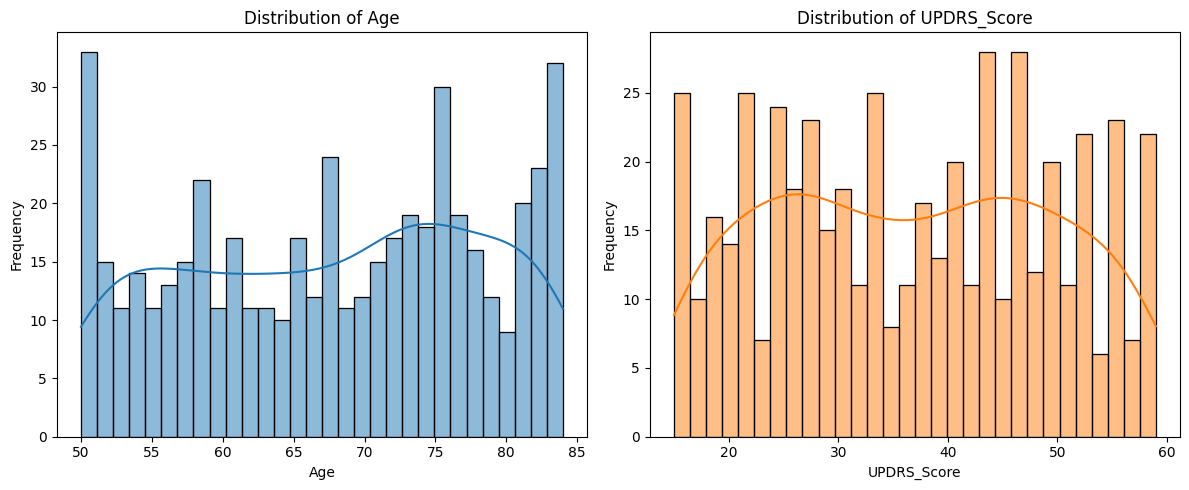

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Continuous features
continuous_cols = ['Age', 'UPDRS_Score']
colors = ['#1f77b4', '#ff7f0e']

# Set up side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, col in enumerate(continuous_cols):
    sns.histplot(df[col], kde=True, bins=30, color=colors[i], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



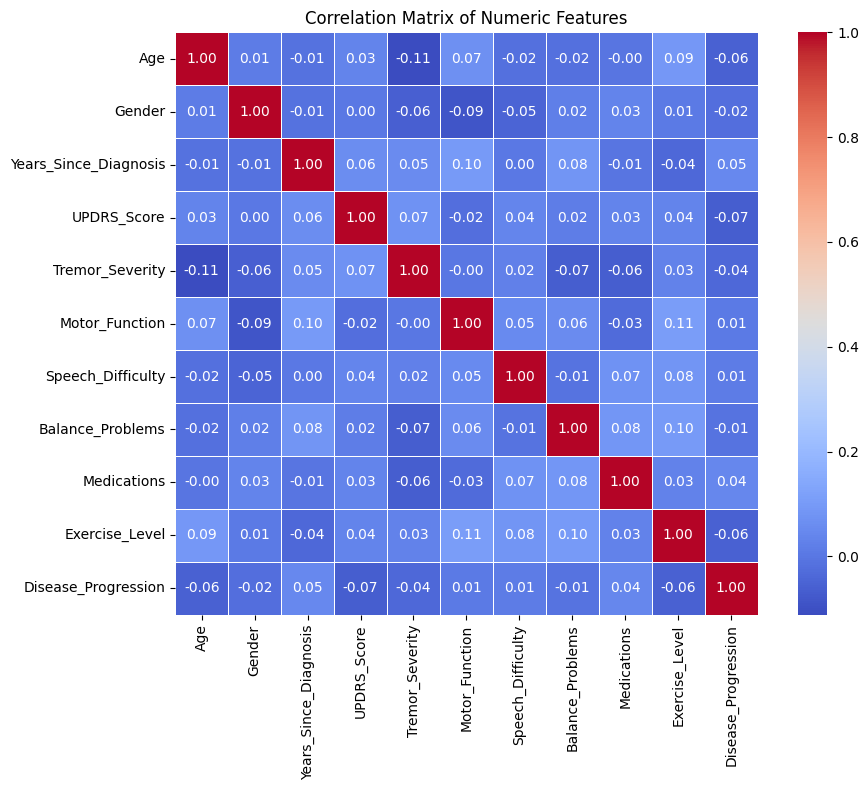

In [91]:
#Step 18 Correlation Matrix

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df is your current DataFrame
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()


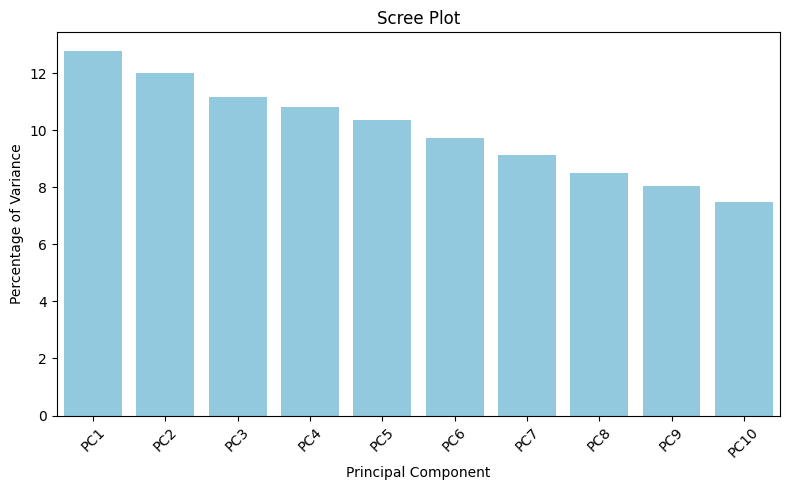

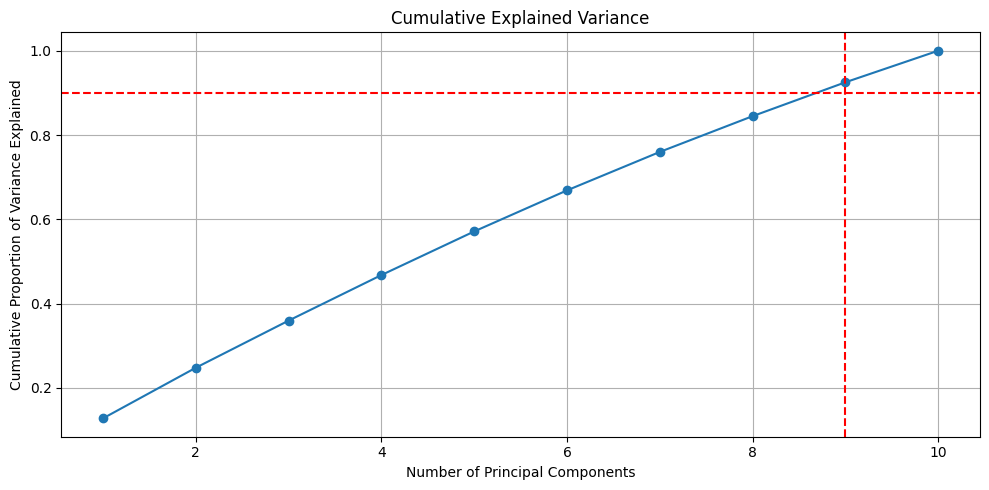

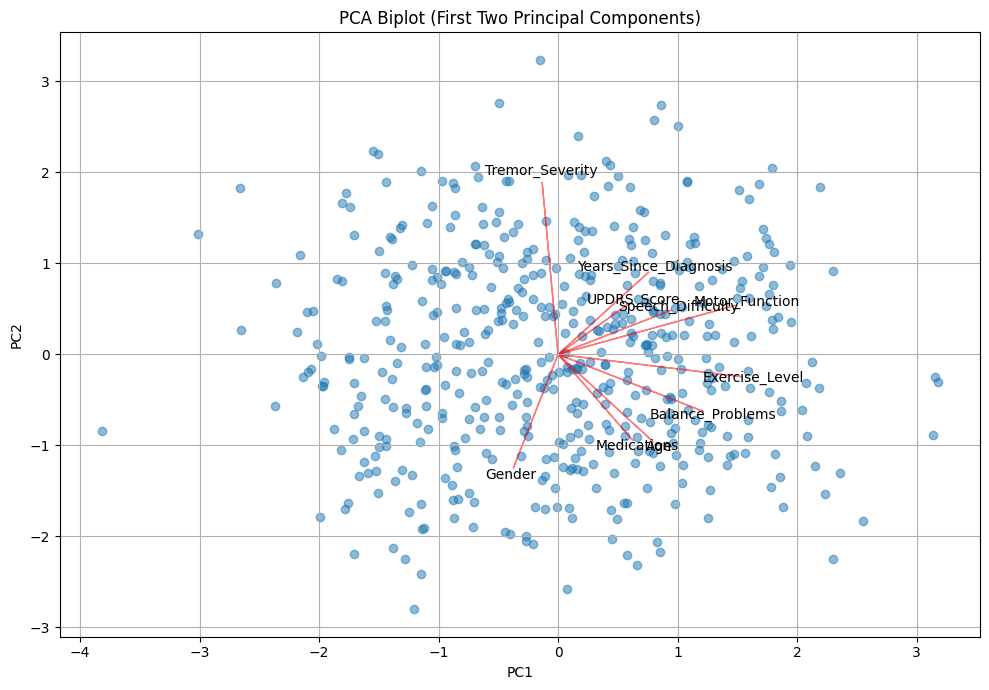

In [92]:
#Step 19 Principal Component Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Select numeric features and scale
numeric_features = df.select_dtypes(include=['int64', 'float64']).drop(columns='Disease_Progression')

# Standardize the numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_features)

# Step 2: Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Step 3: Scree Plot (explained variance per PC)
plt.figure(figsize=(8, 5))
sns.barplot(x=[f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))], 
            y=pca.explained_variance_ratio_ * 100, color='skyblue')
plt.ylabel('Percentage of Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 4: Cumulative Explained Variance Plot
plt.figure(figsize=(10, 5))
cumulative_variance = pca.explained_variance_ratio_.cumsum()
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.axhline(y=0.90, color='r', linestyle='--')
plt.axvline(x=next(i for i, val in enumerate(cumulative_variance) if val > 0.90) + 1, color='r', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 5: PCA Biplot (First Two Principal Components)
def pca_biplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    plt.figure(figsize=(10, 7))
    plt.scatter(xs, ys, alpha=0.5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0]*3, coeff[i, 1]*3, color='red', alpha=0.5)
        if labels is None:
            plt.text(coeff[i, 0]*3.2, coeff[i, 1]*3.2, f"Var{i+1}", color='black', ha='center', va='center')
        else:
            plt.text(coeff[i, 0]*3.2, coeff[i, 1]*3.2, labels[i], color='black', ha='center', va='center')
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("PCA Biplot (First Two Principal Components)")
    plt.grid()
    plt.tight_layout()
    plt.show()

pca_biplot(X_pca, pca.components_.T, labels=numeric_features.columns)


In [93]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE  # For handling class imbalance (optional)

# Load the dataset
df = pd.read_csv("parkinsons_disease_progression_500.csv")

# 1. Drop irrelevant columns
df = df.drop("Patient_ID", axis=1)

# 2. Encode categorical variables
# One-hot encode Gender, Medications, and Exercise_Level
df = pd.get_dummies(df, columns=["Gender", "Medications", "Exercise_Level"], drop_first=True)

# 3. Define features (X) and target (y)
X = df.drop("Disease_Progression", axis=1)
y = df["Disease_Progression"]

# 4. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 5. Scale numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6. (Optional) Handle class imbalance with SMOTE
# Uncomment this section if EDA showed significant class imbalance in Disease_Progression
"""
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
print("Class distribution after SMOTE:\n", y_train.value_counts())
"""

# Verify shapes of processed data
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Training target distribution:\n", y_train.value_counts())
print("Testing target distribution:\n", y_test.value_counts())

# Save preprocessed data (optional)
pd.DataFrame(X_train, columns=X.columns).to_csv("X_train_preprocessed.csv", index=False)
pd.DataFrame(X_test, columns=X.columns).to_csv("X_test_preprocessed.csv", index=False)
pd.Series(y_train, name="Disease_Progression").to_csv("y_train.csv", index=False)
pd.Series(y_test, name="Disease_Progression").to_csv("y_test.csv", index=False)

Training set shape: (400, 13)
Testing set shape: (100, 13)
Training target distribution:
 Disease_Progression
3    146
2    131
1    123
Name: count, dtype: int64
Testing target distribution:
 Disease_Progression
3    36
2    33
1    31
Name: count, dtype: int64


Tuning Logistic Regression (Multinomial)...
Best parameters (Multinomial): {'C': 0.01, 'max_iter': 1000, 'solver': 'saga'}

Logistic Regression (Multinomial) Evaluation:
Accuracy: 0.3300
Macro F1-Score: 0.2959
Confusion Matrix:
[[ 3  8 20]
 [ 7 10 16]
 [ 5 11 20]]

Cross-Validation Macro F1-Scores (Multinomial): [0.39389311 0.30742338 0.18428571 0.34760485 0.30748384]
Mean Macro F1-Score: 0.3081
Standard Deviation of Macro F1-Score: 0.0696

Ordinal Logistic Regression Evaluation:
Accuracy: 0.3400
Macro F1-Score: 0.2630
Confusion Matrix:
[[11  0 20]
 [16  0 17]
 [13  0 23]]

Cross-Validation Macro F1-Scores (Ordinal): [0.29108554 0.22309368 0.31571029 0.26923077 0.26      ]
Mean Macro F1-Score: 0.2718
Standard Deviation of Macro F1-Score: 0.0310


c:\Users\cnmbu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


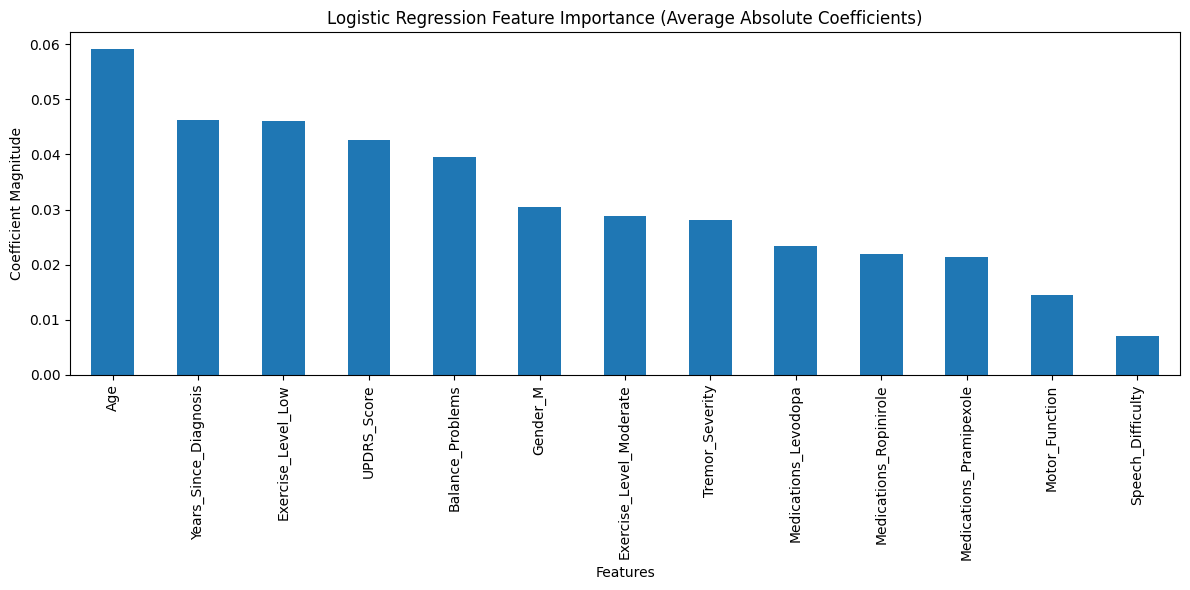

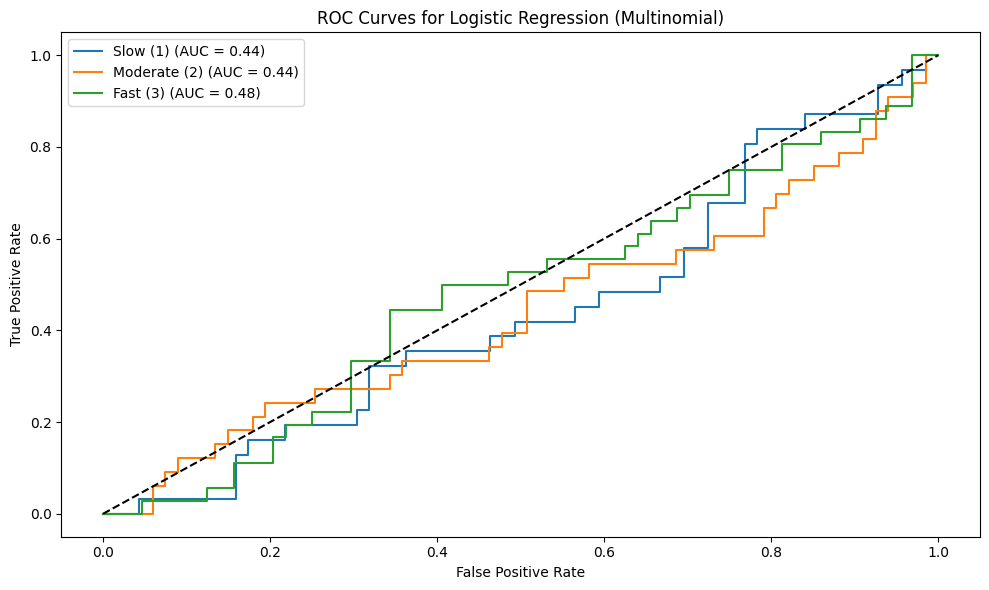

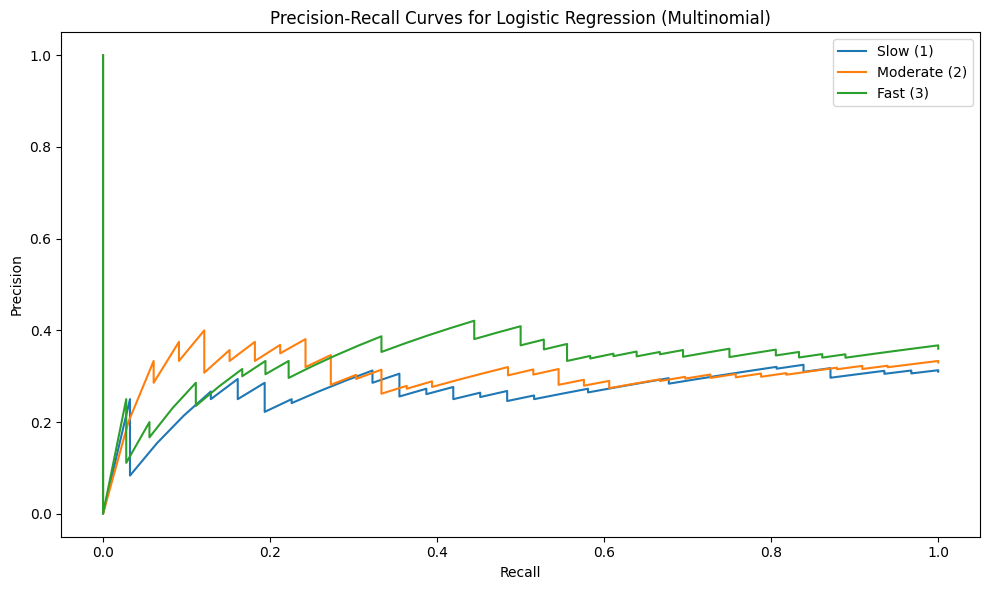

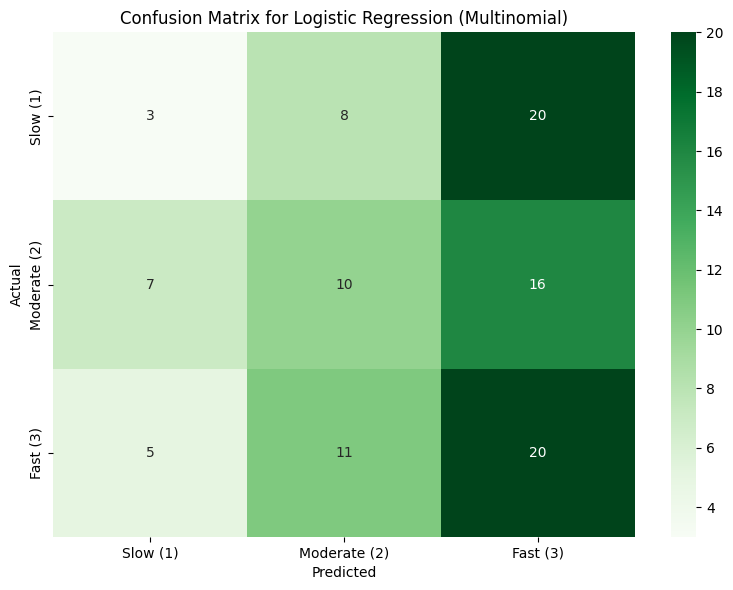


Results saved to 'logistic_regression_results.csv'


In [94]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import mord  # For ordinal logistic regression
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Load preprocessed data (from Step 2)
X_train = pd.read_csv("X_train_preprocessed.csv")
X_test = pd.read_csv("X_test_preprocessed.csv")
y_train = pd.read_csv("y_train.csv")["Disease_Progression"]
y_test = pd.read_csv("y_test.csv")["Disease_Progression"]

# 1. Standard Logistic Regression (Multinomial)
# Define model
lr_model = LogisticRegression(multi_class="multinomial", random_state=42)

# Hyperparameter grid
param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    "solver": ["lbfgs", "saga"],    # Solvers compatible with multinomial
    "max_iter": [1000]
}

# Hyperparameter tuning
print("Tuning Logistic Regression (Multinomial)...")
grid_search_lr = GridSearchCV(lr_model, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search_lr.fit(X_train, y_train)

# Best model
best_lr = grid_search_lr.best_estimator_
print("Best parameters (Multinomial):", grid_search_lr.best_params_)

# Predict and evaluate
y_pred_lr = best_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
macro_f1_lr = f1_score(y_test, y_pred_lr, average="macro")
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

print("\nLogistic Regression (Multinomial) Evaluation:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Macro F1-Score: {macro_f1_lr:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_lr}")

# Cross-validation for macro F1-score
cv_f1_scores_lr = cross_val_score(best_lr, X_train, y_train, cv=5, scoring="f1_macro", n_jobs=-1)
print(f"\nCross-Validation Macro F1-Scores (Multinomial): {cv_f1_scores_lr}")
print(f"Mean Macro F1-Score: {cv_f1_scores_lr.mean():.4f}")
print(f"Standard Deviation of Macro F1-Score: {cv_f1_scores_lr.std():.4f}")

# 2. Ordinal Logistic Regression (using mord)
# Define model (LogisticIT for ordinal regression)
ord_model = mord.LogisticIT(alpha=1.0)  # alpha is regularization parameter

# Fit model (no GridSearchCV as mord has limited options)
ord_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_ord = ord_model.predict(X_test)
accuracy_ord = accuracy_score(y_test, y_pred_ord)
macro_f1_ord = f1_score(y_test, y_pred_ord, average="macro")
conf_matrix_ord = confusion_matrix(y_test, y_pred_ord)

print("\nOrdinal Logistic Regression Evaluation:")
print(f"Accuracy: {accuracy_ord:.4f}")
print(f"Macro F1-Score: {macro_f1_ord:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_ord}")

# Cross-validation for macro F1-score
cv_f1_scores_ord = cross_val_score(ord_model, X_train, y_train, cv=5, scoring="f1_macro", n_jobs=-1)
print(f"\nCross-Validation Macro F1-Scores (Ordinal): {cv_f1_scores_ord}")
print(f"Mean Macro F1-Score: {cv_f1_scores_ord.mean():.4f}")
print(f"Standard Deviation of Macro F1-Score: {cv_f1_scores_ord.std():.4f}")

# 3. Feature Importance (Coefficients for Multinomial Logistic Regression)
# Average absolute coefficients across classes
coef = np.abs(best_lr.coef_).mean(axis=0)  # Average across classes
feature_importance = pd.Series(coef, index=X_train.columns)

plt.figure(figsize=(12, 6))
feature_importance.sort_values(ascending=False).plot(kind="bar")
plt.title("Logistic Regression Feature Importance (Average Absolute Coefficients)")
plt.xlabel("Features")
plt.ylabel("Coefficient Magnitude")
plt.tight_layout()
plt.show()

# 4. ROC Curves (Multinomial Logistic Regression)
y_test_bin = label_binarize(y_test, classes=[1, 2, 3])
y_score_lr = best_lr.predict_proba(X_test)
classes = ["Slow (1)", "Moderate (2)", "Fast (3)"]

plt.figure(figsize=(10, 6))
for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_lr[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{classes[i]} (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Logistic Regression (Multinomial)")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

# 5. Precision-Recall Curves (Multinomial Logistic Regression)
plt.figure(figsize=(10, 6))
for i in range(3):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score_lr[:, i])
    plt.plot(recall, precision, label=f"{classes[i]}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves for Logistic Regression (Multinomial)")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

# 6. Confusion Matrix Visualization (Multinomial Logistic Regression)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap="Greens",
            xticklabels=["Slow (1)", "Moderate (2)", "Fast (3)"],
            yticklabels=["Slow (1)", "Moderate (2)", "Fast (3)"])
plt.title("Confusion Matrix for Logistic Regression (Multinomial)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# 7. Save results
results = pd.DataFrame({
    "Model": ["Logistic Regression (Multinomial)", "Ordinal Logistic Regression"],
    "Accuracy": [accuracy_lr, accuracy_ord],
    "Macro F1-Score": [macro_f1_lr, macro_f1_ord],
    "Macro F1-Score Std": [cv_f1_scores_lr.std(), cv_f1_scores_ord.std()]
})
results.to_csv("logistic_regression_results.csv", index=False)
print("\nResults saved to 'logistic_regression_results.csv'")




In [95]:
import pandas as pd
from sklearn.metrics import classification_report
import mord
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Load preprocessed data (from Step 2)
X_train = pd.read_csv("X_train_preprocessed.csv")
X_test = pd.read_csv("X_test_preprocessed.csv")
y_train = pd.read_csv("y_train.csv")["Disease_Progression"]
y_test = pd.read_csv("y_test.csv")["Disease_Progression"]

# Train Ordinal Logistic Regression (LogisticIT) with best alpha (from previous tuning)
ord_it_model = mord.LogisticIT(alpha=1.0)  # Using alpha=1.0 as an example
ord_it_model.fit(X_train, y_train)

# Predict and generate classification report
y_pred_it = ord_it_model.predict(X_test)
print("\nClassification Report for Ordinal Logistic Regression (LogisticIT):")
print(classification_report(y_test, y_pred_it, target_names=["Slow (1)", "Moderate (2)", "Fast (3)"]))


Classification Report for Ordinal Logistic Regression (LogisticIT):
              precision    recall  f1-score   support

    Slow (1)       0.28      0.35      0.31        31
Moderate (2)       0.00      0.00      0.00        33
    Fast (3)       0.38      0.64      0.48        36

    accuracy                           0.34       100
   macro avg       0.22      0.33      0.26       100
weighted avg       0.22      0.34      0.27       100



Tuning SVC...
Best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}

Classification Report for SVC:
              precision    recall  f1-score   support

    Slow (1)       0.00      0.00      0.00        31
Moderate (2)       0.00      0.00      0.00        33
    Fast (3)       0.36      1.00      0.53        36

    accuracy                           0.36       100
   macro avg       0.12      0.33      0.18       100
weighted avg       0.13      0.36      0.19       100


Cross-Validation Macro F1-Scores: [0.17737003 0.18181818 0.17737003 0.17737003 0.17737003]
Mean Macro F1-Score: 0.1783
Standard Deviation of Macro F1-Score: 0.0018


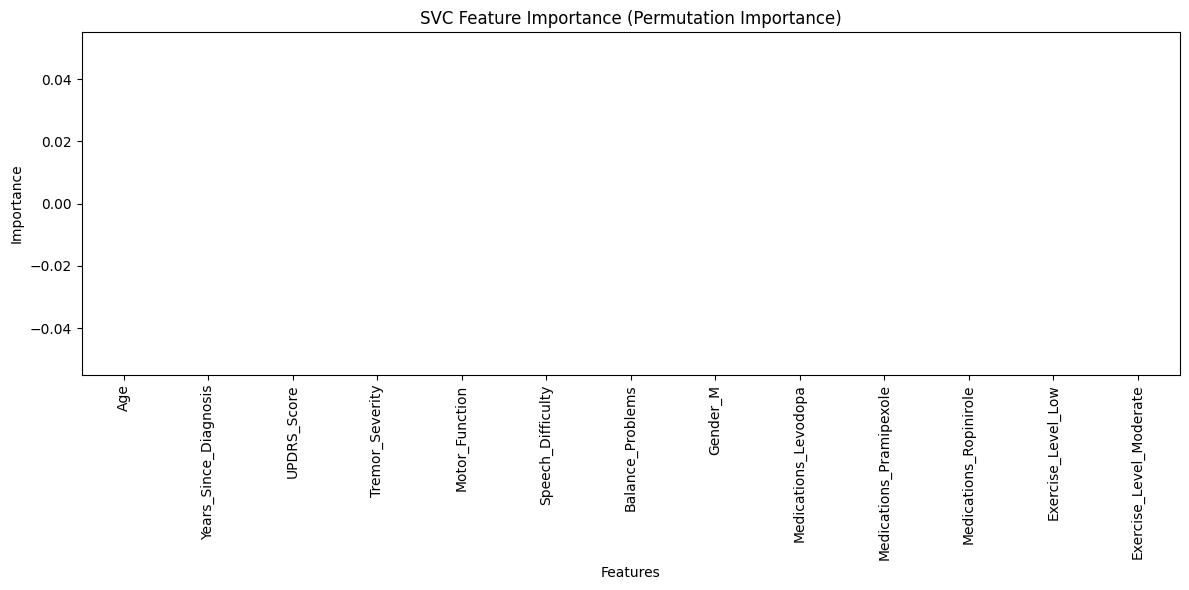

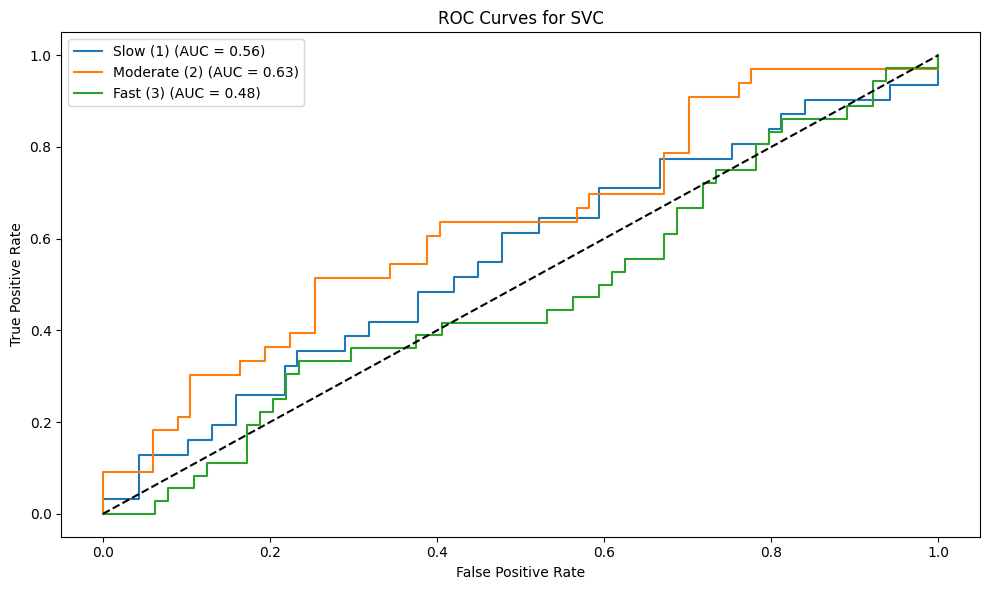

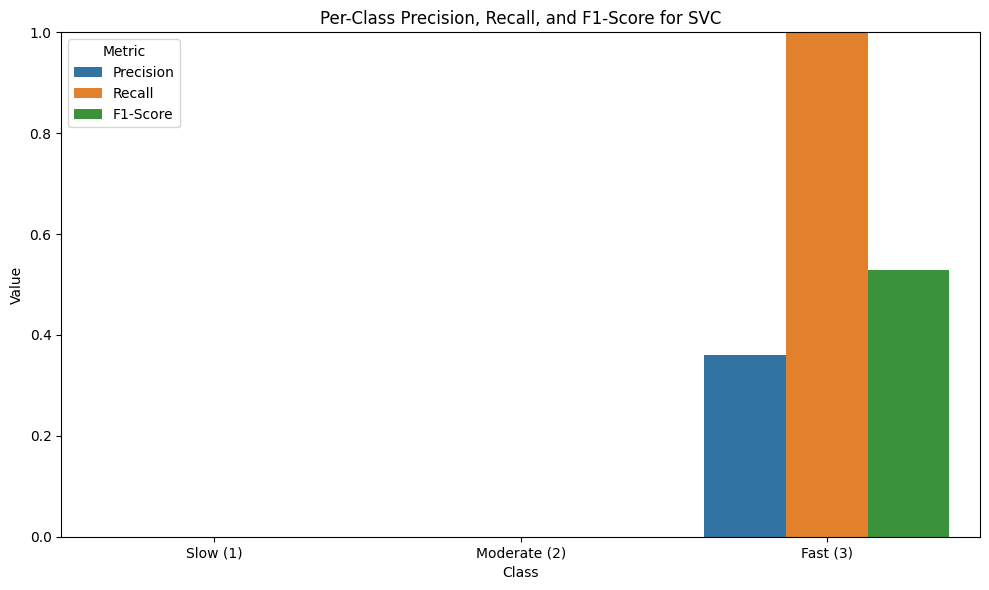

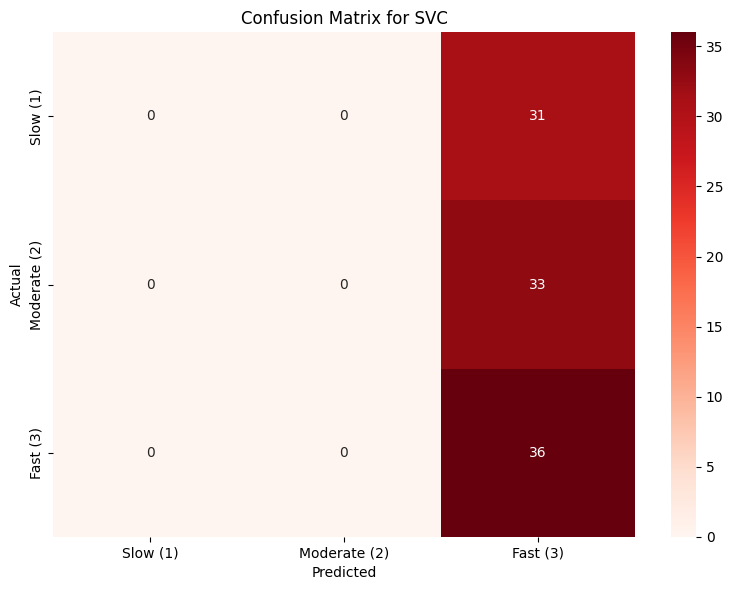

In [96]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Load preprocessed data (from Step 2)
X_train = pd.read_csv("X_train_preprocessed.csv")
X_test = pd.read_csv("X_test_preprocessed.csv")
y_train = pd.read_csv("y_train.csv")["Disease_Progression"]
y_test = pd.read_csv("y_test.csv")["Disease_Progression"]

# 1. SVC Model
# Define model
svc_model = SVC(probability=True, random_state=42)  # probability=True for ROC curves

# Hyperparameter grid
param_grid = {
    "C": [0.1, 1, 10],           # Regularization parameter
    "kernel": ["linear", "rbf"],  # Linear and non-linear kernels
    "gamma": ["scale", "auto"]    # Kernel coefficient (for rbf)
}

# Hyperparameter tuning
print("Tuning SVC...")
grid_search = GridSearchCV(svc_model, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_svc = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# Predict and evaluate
y_pred = best_svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[1, 2, 3])
macro_f1 = f1_score(y_test, y_pred, average="macro")
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report
print("\nClassification Report for SVC:")
print(classification_report(y_test, y_pred, target_names=["Slow (1)", "Moderate (2)", "Fast (3)"]))

# Cross-validation for macro F1-score
cv_f1_scores = cross_val_score(best_svc, X_train, y_train, cv=5, scoring="f1_macro", n_jobs=-1)
print(f"\nCross-Validation Macro F1-Scores: {cv_f1_scores}")
print(f"Mean Macro F1-Score: {cv_f1_scores.mean():.4f}")
print(f"Standard Deviation of Macro F1-Score: {cv_f1_scores.std():.4f}")

# Store results
results = [{
    "Model": "SVC",
    "Accuracy": accuracy,
    "Precision (Slow)": precision[0],
    "Precision (Moderate)": precision[1],
    "Precision (Fast)": precision[2],
    "Recall (Slow)": recall[0],
    "Recall (Moderate)": recall[1],
    "Recall (Fast)": recall[2],
    "F1-Score (Slow)": f1[0],
    "F1-Score (Moderate)": f1[1],
    "F1-Score (Fast)": f1[2],
    "Macro F1-Score": macro_f1,
    "Macro F1-Score Std": cv_f1_scores.std()
}]

# 2. Feature Importance
# Use coefficients for linear kernel, permutation importance for rbf
if grid_search.best_params_["kernel"] == "linear":
    feature_importance = pd.Series(np.abs(best_svc.coef_[0]), index=X_train.columns)
else:
    perm_importance = permutation_importance(best_svc, X_test, y_test, n_repeats=10, random_state=42)
    feature_importance = pd.Series(perm_importance.importances_mean, index=X_train.columns)

plt.figure(figsize=(12, 6))
feature_importance.sort_values(ascending=False).plot(kind="bar")
plt.title(f"SVC Feature Importance ({'Coefficients' if grid_search.best_params_['kernel'] == 'linear' else 'Permutation Importance'})")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# 3. ROC Curves
y_test_bin = label_binarize(y_test, classes=[1, 2, 3])
y_score = best_svc.predict_proba(X_test)
classes = ["Slow (1)", "Moderate (2)", "Fast (3)"]

plt.figure(figsize=(10, 6))
for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{classes[i]} (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for SVC")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

# 4. Per-Class Metrics Visualization
metrics_df = pd.DataFrame({
    "Class": ["Slow (1)", "Moderate (2)", "Fast (3)"] * 3,
    "Metric": ["Precision"] * 3 + ["Recall"] * 3 + ["F1-Score"] * 3,
    "Value": list(precision) + list(recall) + list(f1)
})

plt.figure(figsize=(10, 6))
sns.barplot(x="Class", y="Value", hue="Metric", data=metrics_df)
plt.title("Per-Class Precision, Recall, and F1-Score for SVC")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# 5. Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds",
            xticklabels=["Slow (1)", "Moderate (2)", "Fast (3)"],
            yticklabels=["Slow (1)", "Moderate (2)", "Fast (3)"])
plt.title("Confusion Matrix for SVC")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()



Tuning Decision Tree Classifier...
Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}

Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

    Slow (1)       0.33      0.39      0.36        31
Moderate (2)       0.30      0.27      0.29        33
    Fast (3)       0.41      0.39      0.40        36

    accuracy                           0.35       100
   macro avg       0.35      0.35      0.35       100
weighted avg       0.35      0.35      0.35       100


Cross-Validation Macro F1-Scores: [0.3056666  0.38456442 0.34414118 0.38394132 0.44641337]
Mean Macro F1-Score: 0.3729
Standard Deviation of Macro F1-Score: 0.0469


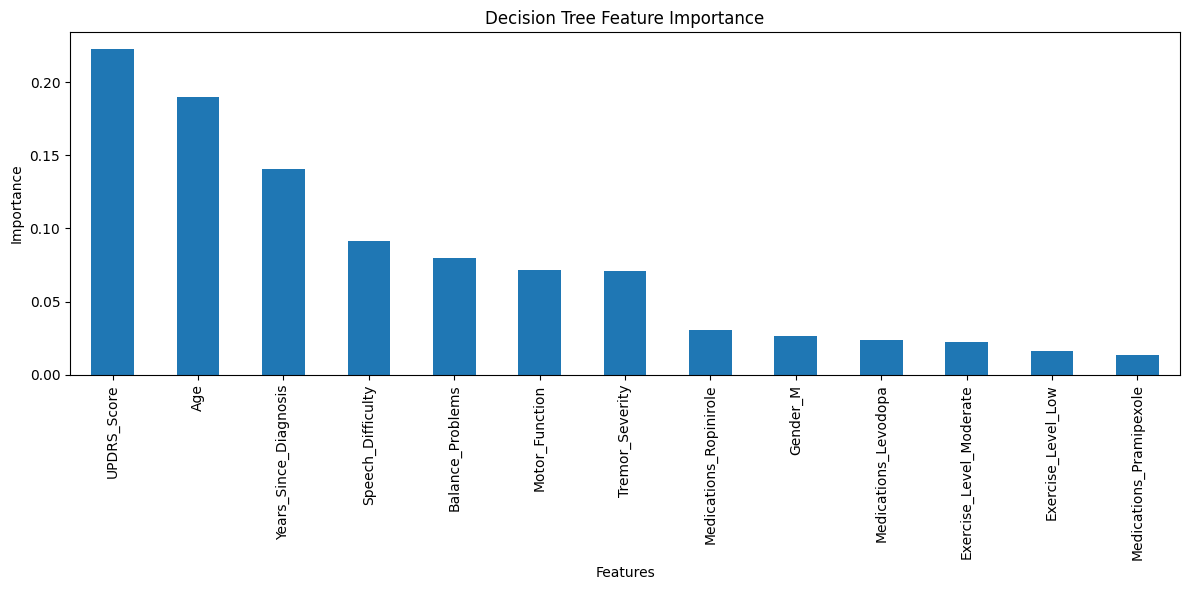

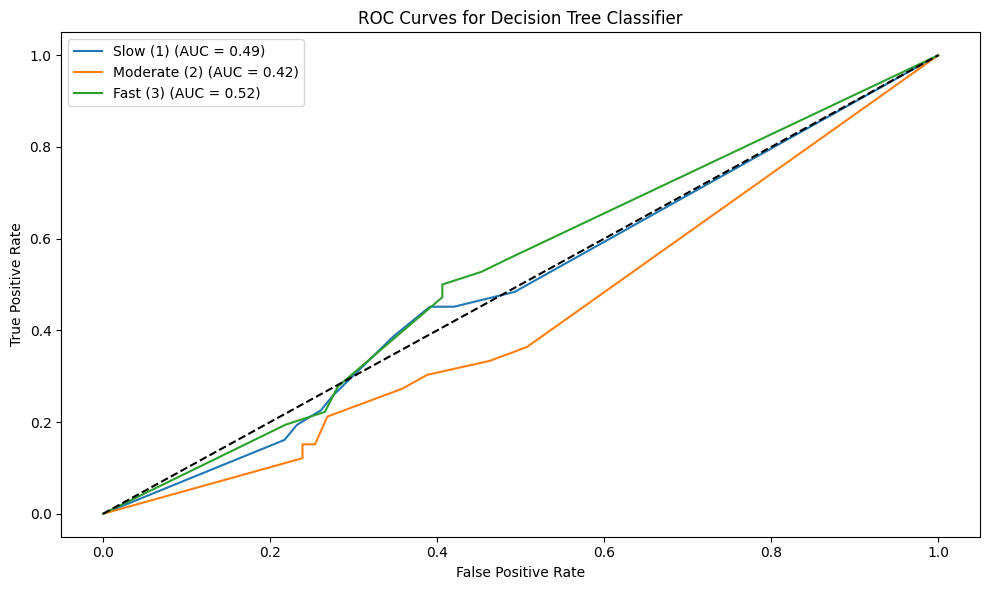

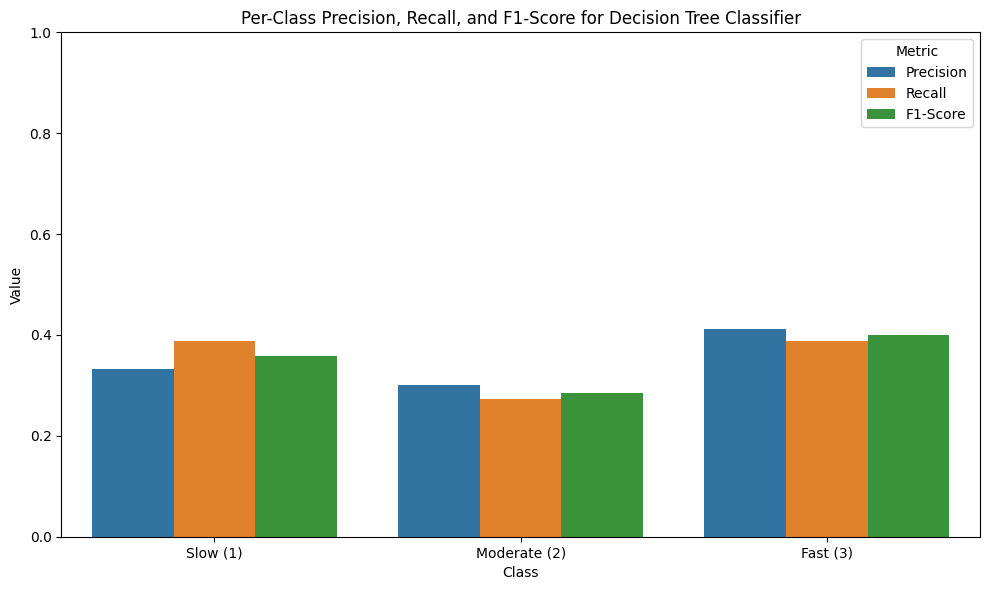

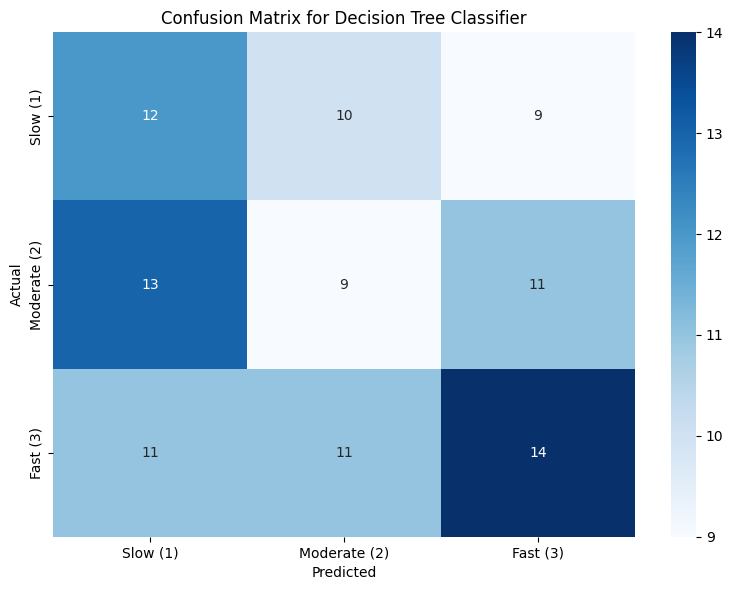

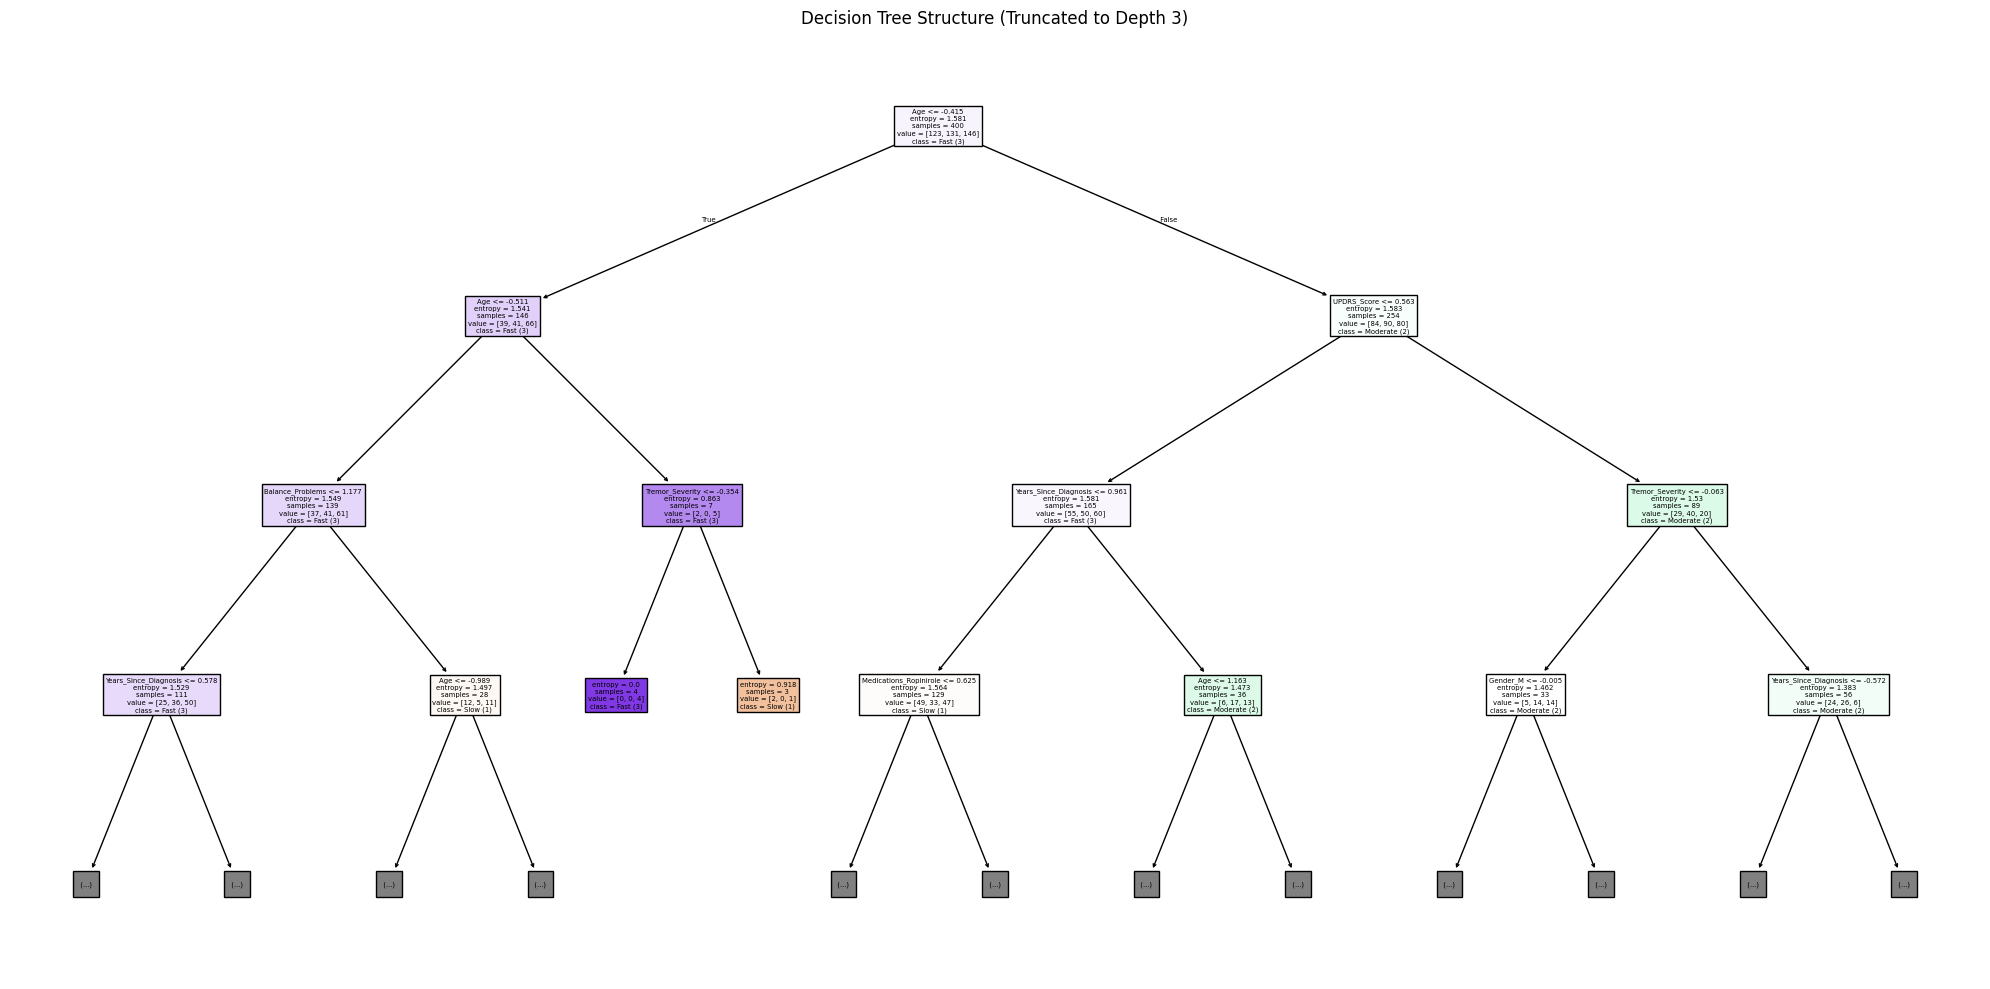


Results saved to 'decision_tree_results.csv'


In [97]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Load preprocessed data (from Step 2)
X_train = pd.read_csv("X_train_preprocessed.csv")
X_test = pd.read_csv("X_test_preprocessed.csv")
y_train = pd.read_csv("y_train.csv")["Disease_Progression"]
y_test = pd.read_csv("y_test.csv")["Disease_Progression"]

# 1. Decision Tree Classifier
# Define model
dt_model = DecisionTreeClassifier(random_state=42)

# Hyperparameter grid
param_grid = {
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"]
}

# Hyperparameter tuning
print("Tuning Decision Tree Classifier...")
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_dt = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# Predict and evaluate
y_pred = best_dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[1, 2, 3])
macro_f1 = f1_score(y_test, y_pred, average="macro")
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report
print("\nClassification Report for Decision Tree Classifier:")
print(classification_report(y_test, y_pred, target_names=["Slow (1)", "Moderate (2)", "Fast (3)"]))

# Cross-validation for macro F1-score
cv_f1_scores = cross_val_score(best_dt, X_train, y_train, cv=5, scoring="f1_macro", n_jobs=-1)
print(f"\nCross-Validation Macro F1-Scores: {cv_f1_scores}")
print(f"Mean Macro F1-Score: {cv_f1_scores.mean():.4f}")
print(f"Standard Deviation of Macro F1-Score: {cv_f1_scores.std():.4f}")

# Store results
results = [{
    "Model": "Decision Tree Classifier",
    "Accuracy": accuracy,
    "Precision (Slow)": precision[0],
    "Precision (Moderate)": precision[1],
    "Precision (Fast)": precision[2],
    "Recall (Slow)": recall[0],
    "Recall (Moderate)": recall[1],
    "Recall (Fast)": recall[2],
    "F1-Score (Slow)": f1[0],
    "F1-Score (Moderate)": f1[1],
    "F1-Score (Fast)": f1[2],
    "Macro F1-Score": macro_f1,
    "Macro F1-Score Std": cv_f1_scores.std()
}]

# 2. Feature Importance
feature_importance = pd.Series(best_dt.feature_importances_, index=X_train.columns)
plt.figure(figsize=(12, 6))
feature_importance.sort_values(ascending=False).plot(kind="bar")
plt.title("Decision Tree Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# 3. ROC Curves
y_test_bin = label_binarize(y_test, classes=[1, 2, 3])
y_score = best_dt.predict_proba(X_test)
classes = ["Slow (1)", "Moderate (2)", "Fast (3)"]

plt.figure(figsize=(10, 6))
for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{classes[i]} (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Decision Tree Classifier")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

# 4. Per-Class Metrics Visualization
metrics_df = pd.DataFrame({
    "Class": ["Slow (1)", "Moderate (2)", "Fast (3)"] * 3,
    "Metric": ["Precision"] * 3 + ["Recall"] * 3 + ["F1-Score"] * 3,
    "Value": list(precision) + list(recall) + list(f1)
})

plt.figure(figsize=(10, 6))
sns.barplot(x="Class", y="Value", hue="Metric", data=metrics_df)
plt.title("Per-Class Precision, Recall, and F1-Score for Decision Tree Classifier")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# 5. Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Slow (1)", "Moderate (2)", "Fast (3)"],
            yticklabels=["Slow (1)", "Moderate (2)", "Fast (3)"])
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# 6. Visualize Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(best_dt, feature_names=X_train.columns, class_names=["Slow (1)", "Moderate (2)", "Fast (3)"], filled=True, max_depth=3)
plt.title("Decision Tree Structure (Truncated to Depth 3)")
plt.tight_layout()
plt.show()

# 7. Save results
results_df = pd.DataFrame(results)
results_df.to_csv("decision_tree_results.csv", index=False)
print("\nResults saved to 'decision_tree_results.csv'")


Tuning Random Forest Classifier...
Best parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

    Slow (1)       0.31      0.26      0.28        31
Moderate (2)       0.29      0.27      0.28        33
    Fast (3)       0.37      0.44      0.41        36

    accuracy                           0.33       100
   macro avg       0.32      0.33      0.32       100
weighted avg       0.33      0.33      0.33       100


Cross-Validation Macro F1-Scores: [0.34898225 0.36993668 0.30179028 0.36374261 0.37081568]
Mean Macro F1-Score: 0.3511
Standard Deviation of Macro F1-Score: 0.0258


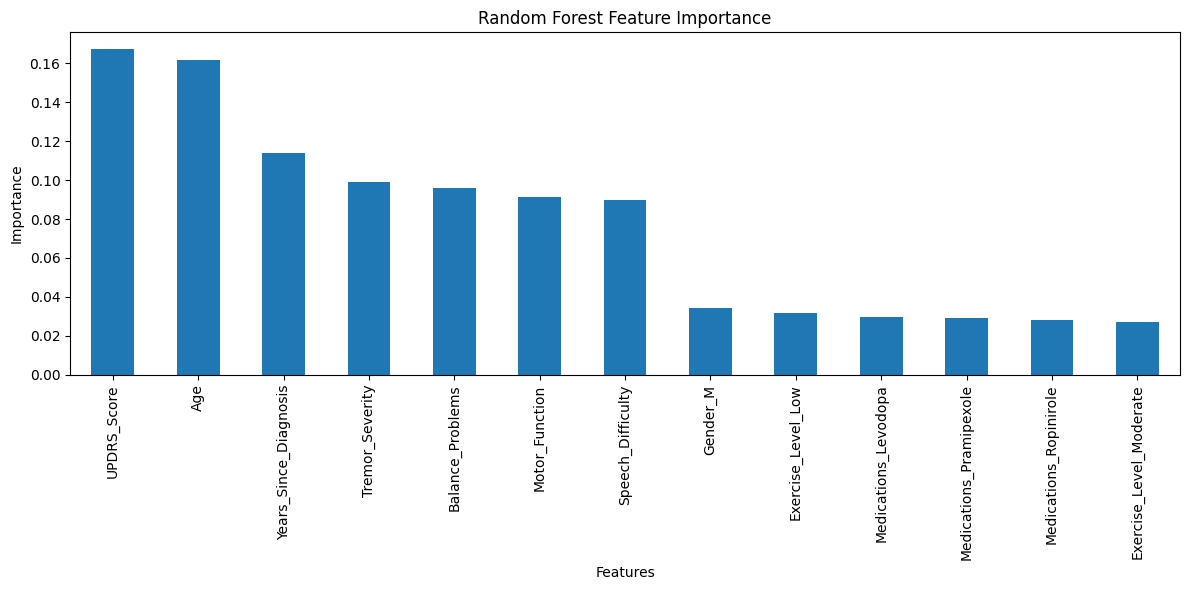

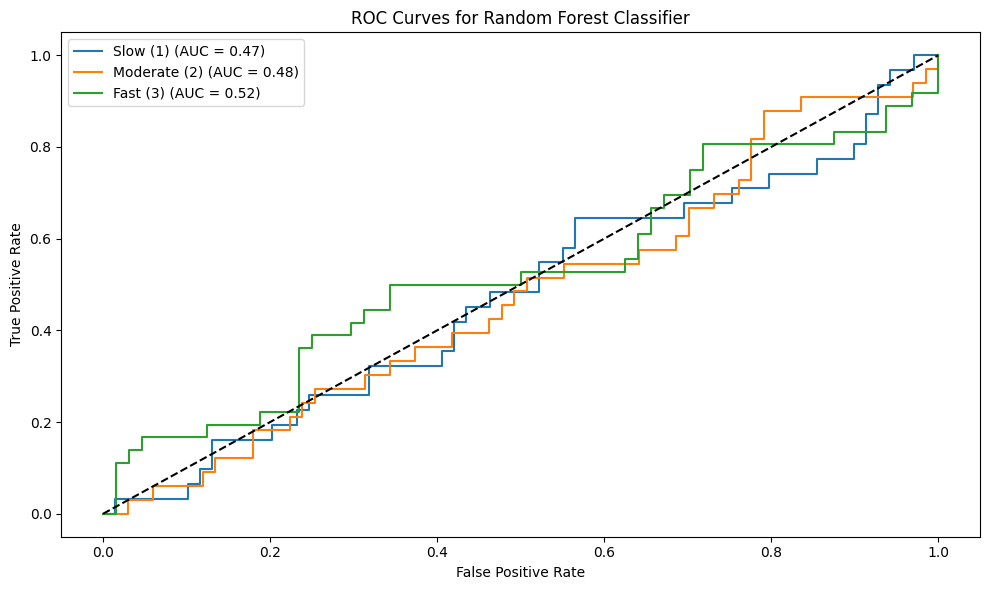

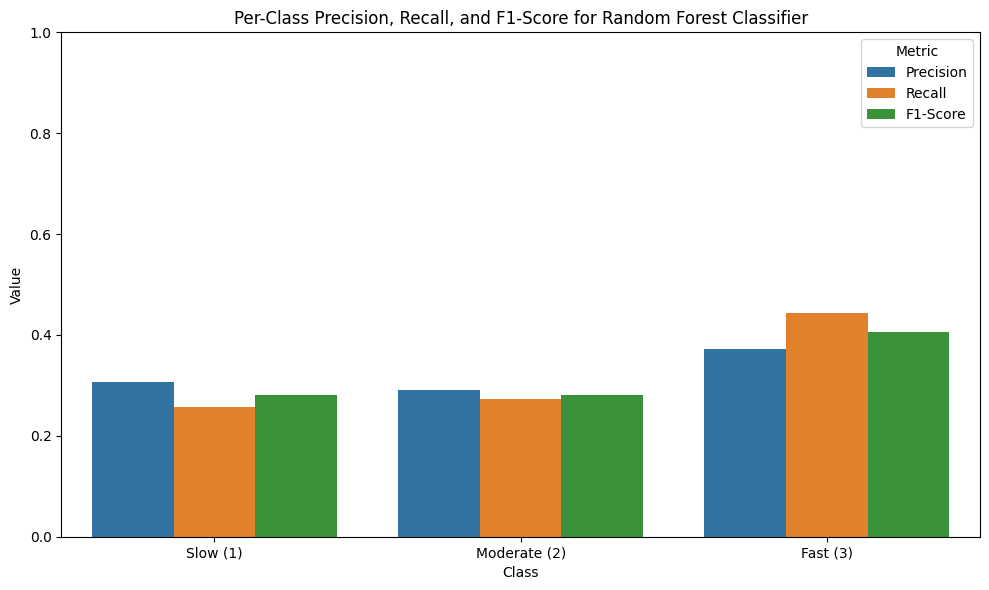

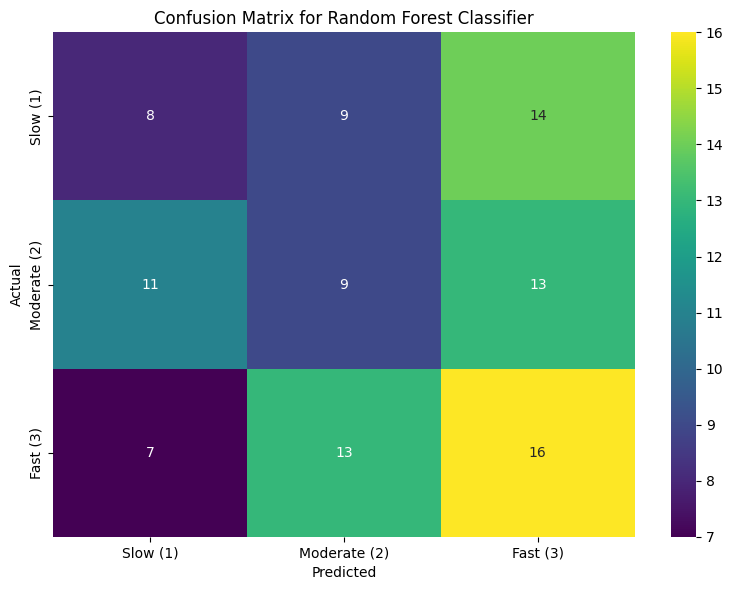

In [98]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Load preprocessed data (from Step 2)
X_train = pd.read_csv("X_train_preprocessed.csv")
X_test = pd.read_csv("X_test_preprocessed.csv")
y_train = pd.read_csv("y_train.csv")["Disease_Progression"]
y_test = pd.read_csv("y_test.csv")["Disease_Progression"]

# 1. Random Forest Classifier
# Define model
rf_model = RandomForestClassifier(random_state=42)

# Hyperparameter grid
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "criterion": ["gini", "entropy"]
}

# Hyperparameter tuning
print("Tuning Random Forest Classifier...")
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# Predict and evaluate
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[1, 2, 3])
macro_f1 = f1_score(y_test, y_pred, average="macro")
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report
print("\nClassification Report for Random Forest Classifier:")
print(classification_report(y_test, y_pred, target_names=["Slow (1)", "Moderate (2)", "Fast (3)"]))

# Cross-validation for macro F1-score
cv_f1_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring="f1_macro", n_jobs=-1)
print(f"\nCross-Validation Macro F1-Scores: {cv_f1_scores}")
print(f"Mean Macro F1-Score: {cv_f1_scores.mean():.4f}")
print(f"Standard Deviation of Macro F1-Score: {cv_f1_scores.std():.4f}")

# Store results
results = [{
    "Model": "Random Forest Classifier",
    "Accuracy": accuracy,
    "Precision (Slow)": precision[0],
    "Precision (Moderate)": precision[1],
    "Precision (Fast)": precision[2],
    "Recall (Slow)": recall[0],
    "Recall (Moderate)": recall[1],
    "Recall (Fast)": recall[2],
    "F1-Score (Slow)": f1[0],
    "F1-Score (Moderate)": f1[1],
    "F1-Score (Fast)": f1[2],
    "Macro F1-Score": macro_f1,
    "Macro F1-Score Std": cv_f1_scores.std()
}]

# 2. Feature Importance
feature_importance = pd.Series(best_rf.feature_importances_, index=X_train.columns)
plt.figure(figsize=(12, 6))
feature_importance.sort_values(ascending=False).plot(kind="bar")
plt.title("Random Forest Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# 3. ROC Curves
y_test_bin = label_binarize(y_test, classes=[1, 2, 3])
y_score = best_rf.predict_proba(X_test)
classes = ["Slow (1)", "Moderate (2)", "Fast (3)"]

plt.figure(figsize=(10, 6))
for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{classes[i]} (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Random Forest Classifier")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

# 4. Per-Class Metrics Visualization
metrics_df = pd.DataFrame({
    "Class": ["Slow (1)", "Moderate (2)", "Fast (3)"] * 3,
    "Metric": ["Precision"] * 3 + ["Recall"] * 3 + ["F1-Score"] * 3,
    "Value": list(precision) + list(recall) + list(f1)
})

plt.figure(figsize=(10, 6))
sns.barplot(x="Class", y="Value", hue="Metric", data=metrics_df)
plt.title("Per-Class Precision, Recall, and F1-Score for Random Forest Classifier")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# 5. Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis",
            xticklabels=["Slow (1)", "Moderate (2)", "Fast (3)"],
            yticklabels=["Slow (1)", "Moderate (2)", "Fast (3)"])
plt.title("Confusion Matrix for Random Forest Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()



Tuning Ensemble Model...
Best parameters: {'rf__max_depth': None, 'rf__n_estimators': 100, 'svc__C': 1, 'svc__gamma': 'scale', 'xgb__learning_rate': 0.1, 'xgb__n_estimators': 100}

Classification Report for Ensemble Model (RF + SVC + XGBoost):
              precision    recall  f1-score   support

    Slow (1)       0.31      0.26      0.28        31
Moderate (2)       0.35      0.39      0.37        33
    Fast (3)       0.38      0.39      0.38        36

    accuracy                           0.35       100
   macro avg       0.35      0.35      0.35       100
weighted avg       0.35      0.35      0.35       100


Cross-Validation Macro F1-Scores: [0.27795961 0.39353303 0.31423436 0.37223887 0.45153061]
Mean Macro F1-Score: 0.3619
Standard Deviation of Macro F1-Score: 0.0608


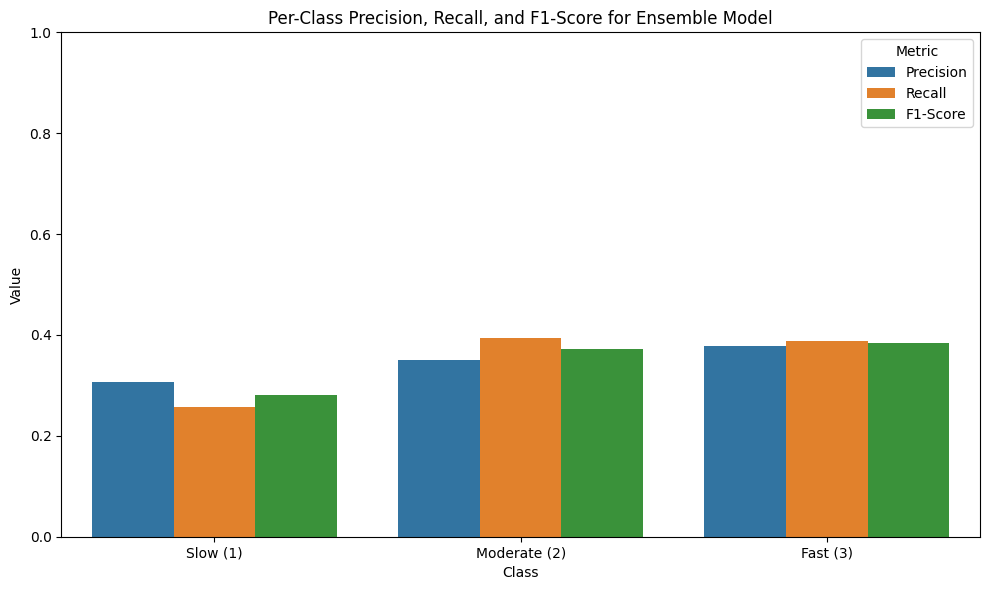

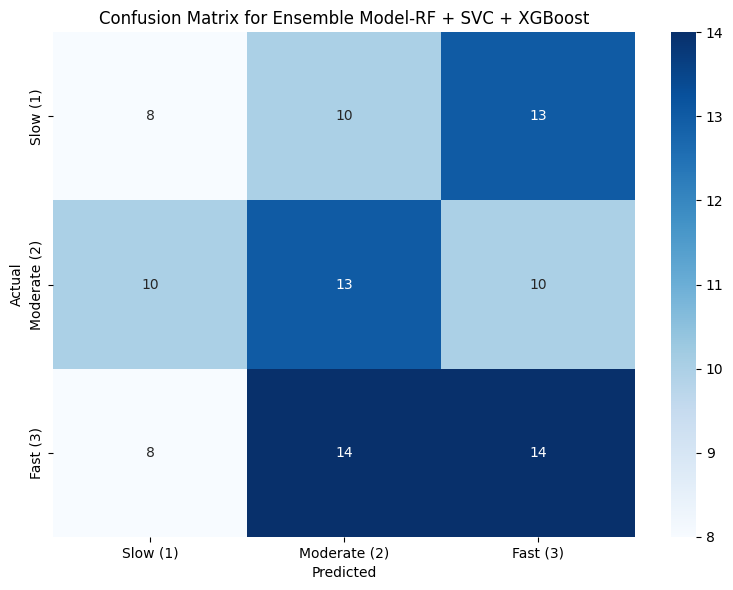

In [99]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Load preprocessed data (from Step 2)
X_train = pd.read_csv("X_train_preprocessed.csv")
X_test = pd.read_csv("X_test_preprocessed.csv")
y_train = pd.read_csv("y_train.csv")["Disease_Progression"]
y_test = pd.read_csv("y_test.csv")["Disease_Progression"]

# Adjust y_train and y_test for XGBoost (0-based indexing)
y_train_adj = y_train - 1  # Convert [1, 2, 3] to [0, 1, 2]
y_test_adj = y_test - 1    # Convert [1, 2, 3] to [0, 1, 2]

# 1. Ensemble Learning
# Define individual models with reasonable parameters
rf_model = RandomForestClassifier(
    n_estimators=200, max_depth=None, min_samples_split=2, min_samples_leaf=1, criterion="gini", random_state=42
)
svc_model = SVC(
    C=1, kernel="rbf", gamma="scale", probability=True, random_state=42
)
xgb_model = XGBClassifier(
    n_estimators=100, learning_rate=0.1, max_depth=3, eval_metric="mlogloss", random_state=42
)

# Define ensemble model (VotingClassifier with soft voting)
ensemble_model = VotingClassifier(
    estimators=[
        ("rf", rf_model),
        ("svc", svc_model),
        ("xgb", xgb_model)
    ],
    voting="soft"  # Soft voting uses predicted probabilities
)

# Hyperparameter grid for ensemble (tuning key parameters)
param_grid = {
    "rf__n_estimators": [100, 200],
    "rf__max_depth": [None, 10],
    "svc__C": [1, 10],
    "svc__gamma": ["scale", "auto"],
    "xgb__n_estimators": [100, 200],
    "xgb__learning_rate": [0.05, 0.1]
}

# Hyperparameter tuning
print("Tuning Ensemble Model...")
grid_search = GridSearchCV(ensemble_model, param_grid, cv=5, scoring="accuracy", n_jobs=-1, error_score='raise')
grid_search.fit(X_train, y_train_adj)

# Best model
best_ensemble = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# Predict and evaluate
y_pred_adj = best_ensemble.predict(X_test)
y_pred = y_pred_adj + 1  # Convert back to [1, 2, 3] for evaluation
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[1, 2, 3])
macro_f1 = f1_score(y_test, y_pred, average="macro")
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report
print("\nClassification Report for Ensemble Model (RF + SVC + XGBoost):")
print(classification_report(y_test, y_pred, target_names=["Slow (1)", "Moderate (2)", "Fast (3)"]))

# Cross-validation for macro F1-score
cv_f1_scores = cross_val_score(best_ensemble, X_train, y_train_adj, cv=5, scoring="f1_macro", n_jobs=-1)
print(f"\nCross-Validation Macro F1-Scores: {cv_f1_scores}")
print(f"Mean Macro F1-Score: {cv_f1_scores.mean():.4f}")
print(f"Standard Deviation of Macro F1-Score: {cv_f1_scores.std():.4f}")

# Store results
results = [{
    "Model": "Ensemble (RF + SVC + XGBoost)",
    "Accuracy": accuracy,
    "Precision (Slow)": precision[0],
    "Precision (Moderate)": precision[1],
    "Precision (Fast)": precision[2],
    "Recall (Slow)": recall[0],
    "Recall (Moderate)": recall[1],
    "Recall (Fast)": recall[2],
    "F1-Score (Slow)": f1[0],
    "F1-Score (Moderate)": f1[1],
    "F1-Score (Fast)": f1[2],
    "Macro F1-Score": macro_f1,
    "Macro F1-Score Std": cv_f1_scores.std()
}]

# 2. Per-Class Metrics Visualization
metrics_df = pd.DataFrame({
    "Class": ["Slow (1)", "Moderate (2)", "Fast (3)"] * 3,
    "Metric": ["Precision"] * 3 + ["Recall"] * 3 + ["F1-Score"] * 3,
    "Value": list(precision) + list(recall) + list(f1)
})

plt.figure(figsize=(10, 6))
sns.barplot(x="Class", y="Value", hue="Metric", data=metrics_df)
plt.title("Per-Class Precision, Recall, and F1-Score for Ensemble Model")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# 3. Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Slow (1)", "Moderate (2)", "Fast (3)"],
            yticklabels=["Slow (1)", "Moderate (2)", "Fast (3)"])
plt.title("Confusion Matrix for Ensemble Model-RF + SVC + XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()



In [100]:
import pandas as pd

# Manually construct the consolidated matrix
data = [
    ["Logistic Regression (Multinomial)", 0.3300, 0.2959, 0.3081, 0.0696],
    ["Support Vector Classifier (SVC)",   0.3600, 0.1800, 0.1783, 0.0018],
    ["Decision Tree Classifier",          0.3500, 0.3500, 0.3729, 0.0469],
    ["Random Forest Classifier",          0.3300, 0.3200, 0.3511, 0.0258],
    ["Ensemble Model (RF + SVC + XGB)",   0.3500, 0.3500, 0.3619, 0.0608],
]

# Create DataFrame
columns = ["Model", "Accuracy", "F1 Score (Macro)", "CV Mean F1", "CV Std F1"]
matrix_df = pd.DataFrame(data, columns=columns)

# Display the matrix
matrix_df


,Model,Accuracy,F1 Score (Macro),CV Mean F1,CV Std F1
0,Logistic Regression (Multinomial),0.33,0.2959,0.3081,0.0696
1,Support Vector Classifier (SVC),0.36,0.1800,0.1783,0.0018
2,Decision Tree Classifier,0.35,0.3500,0.3729,0.0469
3,Random Forest Classifier,0.33,0.3200,0.3511,0.0258
4,Ensemble Model (RF + SVC + XGB),0.35,0.3500,0.3619,0.0608


c:\Users\cnmbu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\cnmbu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\cnmbu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, 

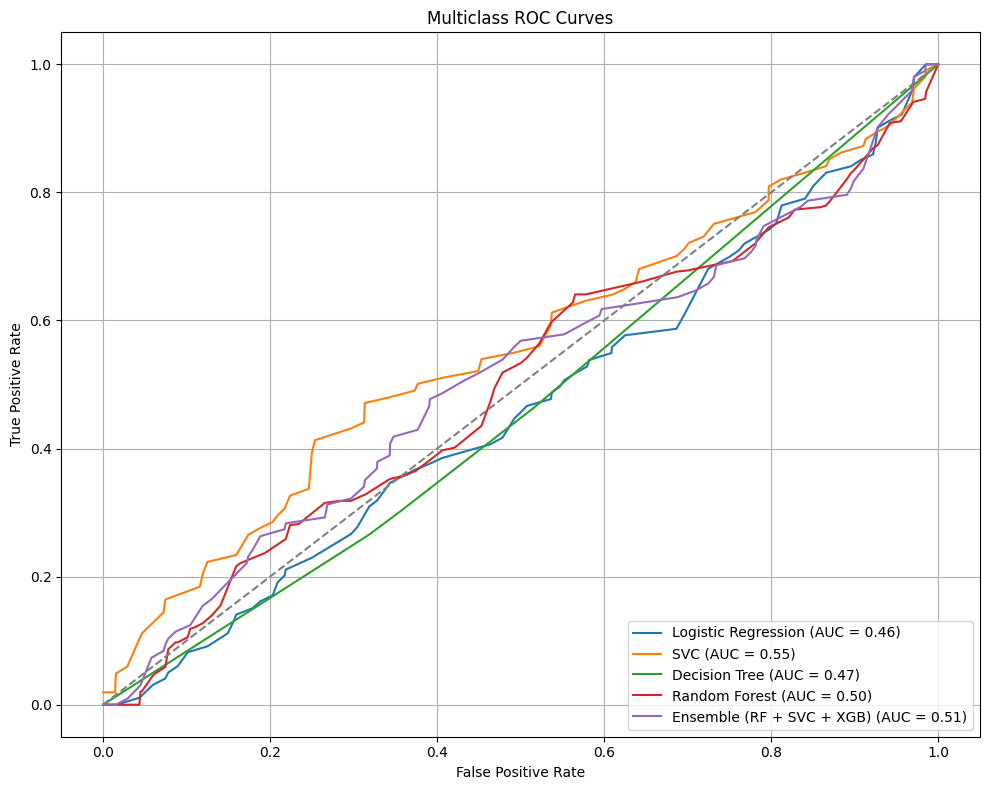

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# Binarize labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[1, 2, 3])
n_classes = y_test_bin.shape[1]

# Define models (must support predict_proba or use decision_function)
models = {
    "Logistic Regression": LogisticRegression(C=0.01, max_iter=1000, solver='saga', multi_class='multinomial'),
    "SVC": SVC(C=0.1, kernel='rbf', probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Ensemble (RF + SVC + XGB)": VotingClassifier(estimators=[
        ('rf', RandomForestClassifier(n_estimators=100)),
        ('svc', SVC(probability=True, C=1, kernel='rbf')),
        # Add your XGBClassifier here if using XGBoost
    ], voting='soft')
}

# Train and plot ROC for each model
plt.figure(figsize=(10, 8))

for name, model in models.items():
    ovr = OneVsRestClassifier(model)
    ovr.fit(X_train, label_binarize(y_train, classes=[1, 2, 3]))
    y_score = ovr.predict_proba(X_test)

    # Compute macro-average ROC curve
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Average ROC (macro)
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes

    plt.plot(all_fpr, mean_tpr, label=f"{name} (AUC = {auc(all_fpr, mean_tpr):.2f})")

# Plot formatting
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curves")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()
